<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/vgg_classifier_99_9__accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

from keras.layers import Dense,Flatten,MaxPooling2D,Convolution2D,Dropout,GlobalAveragePooling2D
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
Class_names = []
mypath = '/content/drive/My Drive/Combined_Dataset_for_train'
for (dirpath, dirnames, filenames) in os.walk(mypath):
    Class_names.extend(dirnames)
    break

In [ ]:
Class_names

['driving_license_front',
 'driving_license_back',
 'Pan',
 'Aadhaar_front',
 'Voter_id_front',
 'RC',
 'passport_front',
 'Aadhaar_back',
 'passport_back',
 'Voter_id_back']

In [ ]:
from os import walk
directory='/content/drive/My Drive/Combined_Dataset_for_train'
categories=['Voter_id_back','Voter_id_front','Pan','Aadhaar_front','driving_license_front','passport_front','Aadhaar_back','passport_back','driving_license_back',"RC"]
X = []
Y = []
Count=[]
for category in categories:
  path = os.path.join(directory,category)
  count= 0
  for img in os.listdir(path):
    count+=1
  Count.append(count)

In [ ]:
for i in range(len(Count)):
  print(categories[i],Count[i])

Voter_id_back 141
Voter_id_front 128
Pan 498
Aadhaar_front 360
driving_license_front 184
passport_front 157
Aadhaar_back 115
passport_back 121
driving_license_back 39
RC 25


In [ ]:
temp=[]
for i in (Count):
  if 250//i==0:
    temp.append(1)
  else:
    temp.append(250//i)

In [ ]:
temp

[1, 1, 1, 1, 1, 1, 2, 2, 6, 10]

In [ ]:
import os
from os import walk
directory='/content/drive/My Drive/Combined_Dataset_for_train'
categories=['Voter_id_back','Voter_id_front','Pan','Aadhaar_front','driving_license_front','passport_front','Aadhaar_back','passport_back','driving_license_back','RC']

X_test = []
y_test = []
X = []
Y = []
i = -1
j=0
fl=0
df = pd.DataFrame()
for category in categories:
  path = os.path.join(directory,category)
  i+=1
  for img in os.listdir(path):
    if img.endswith(('jpg', 'png','jpeg','JPG','PNG','JPEG')):
      try:
        j+=1
        image = (cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))
        image = cv2.resize(image,(224,224))                     
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      
        if j%5==0:
          X_test.append(image)
          y_test.append(category)
        else:
          X.append(image)
          Y.append(category)
          sample_image = expand_dims(image, 0)
          sample_image1 = expand_dims(image, 0)
          datagenertor = ImageDataGenerator(brightness_range=[0.1,1.0],rotation_range=90,zoom_range=0.2)
          datagenertor1 = ImageDataGenerator(brightness_range=[0.1,1.0],rotation_range=40,zoom_range=0.2)
          iterator = datagenertor.flow(sample_image, batch_size=4)
          iterator1=datagenertor1.flow(sample_image1, batch_size=4)
          for k in range(temp[i]):
            for b in range(4):
              batch = iterator.next()
              batch1 = iterator1.next()
              image = batch[0].astype('uint8')
                      
              X.append(cv2.resize(image,(224,224)))
              Y.append(category)
              image1 = batch1[0].astype('uint8')          
              X.append(cv2.resize(image1,(224,224)))
              Y.append(category)              
      except Exception as e:
        print(img)
        continue

167.jpg
adhb_39_1.jpg
adhb_38_1.jpg
adhb_37_1.jpg


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the classes')

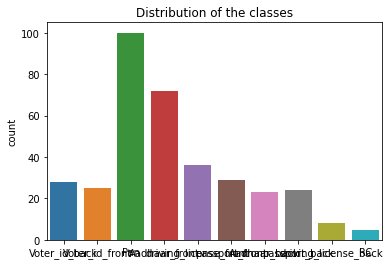

In [ ]:
sns.countplot(y_test)
plt.title("Distribution of the classes")

In [ ]:
print("Total number of Records",len(Y))
for i in categories:
  print("Total number of",i," ",Y.count(i))

Total number of Records 16734
Total number of Voter_id_back   1017
Total number of Voter_id_front   909
Total number of Pan   3573
Total number of Aadhaar_front   2592
Total number of driving_license_front   1296
Total number of passport_front   1080
Total number of Aadhaar_back   1513
Total number of passport_back   1615
Total number of driving_license_back   1519
Total number of RC   1620


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the classes')

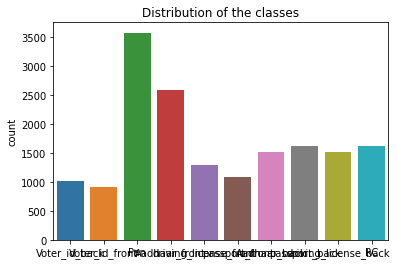

In [ ]:
sns.countplot(Y)
plt.title("Distribution of the classes")

In [ ]:
from keras.utils import np_utils
import pickle
X = np.array(X)
le_ = LabelEncoder()
Y = (le_.fit_transform(Y))

output = open('/content/drive/MyDrive/models/encoder.pkl', 'wb')
pickle.dump(le_, output)
output.close()

Y= np_utils.to_categorical(Y)

In [ ]:
from keras.utils import np_utils
X_test = np.array(X_test)
le_ = LabelEncoder()
y_test = (le_.fit_transform(y_test))
y_test= np_utils.to_categorical(y_test)


In [ ]:
from keras.applications.vgg16  import VGG16
from keras.models import Sequential, load_model, Model
from keras.models import load_model


img_height,img_width = 224,224          ## default input size
num_classes = len(categories)                        ## Total Classes

base_model = VGG16(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))

# Final dense layers
x = base_model.output           ## getting features
x = GlobalAveragePooling2D()(x) ## Average Pooling
x = Dropout(0.3)(x)             ## Dropout

# Final softmax layer
predictions = Dense(num_classes, activation= 'softmax')(x)  
model = Model(inputs = base_model.input, outputs = predictions)

model = load_model('/content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v1.h5')

# compiling the model
adam = Adam(lr=1e-5, decay=1e-6)
model.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,stratify=Y,test_size=0.3)

In [ ]:
X_train.shape

(11713, 224, 224, 3)

In [ ]:
early_stopping = EarlyStopping(patience=15, verbose=1,restore_best_weights=True)

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v5_batch_size_4.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
history = model.fit(X_train, y_train,batch_size=40,epochs=40, callbacks=[checkpoint,early_stopping], validation_data=(X_val,y_val))

Epoch 1/40
293/293 [==============================] - 242s 678ms/step - loss: 0.5942 - accuracy: 0.9115 - val_loss: 0.0818 - val_accuracy: 0.9859

Epoch 00001: val_accuracy improved from -inf to 0.98586, saving model to /content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v5_batch_size_4.h5
Epoch 2/40
293/293 [==============================] - 187s 639ms/step - loss: 0.0884 - accuracy: 0.9801 - val_loss: 0.0505 - val_accuracy: 0.9908

Epoch 00002: val_accuracy improved from 0.98586 to 0.99084, saving model to /content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v5_batch_size_4.h5
Epoch 3/40
293/293 [==============================] - 187s 640ms/step - loss: 0.0409 - accuracy: 0.9890 - val_loss: 0.0404 - val_accuracy: 0.9928

Epoch 00003: val_accuracy improved from 0.99084 to 0.99283, saving model to /content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v5_batch_size_4.h5
Epoch 4/40
293/293 [==============================] - 187s 639ms/step - loss: 0.0369 - accuracy: 0.9929 - val

In [ ]:
y_train.shape

NameError: ignored

In [ ]:
model = load_model('/content/drive/MyDrive/models/KYC_Vgg_transfer_learning_v5_batch_size_4_99.9.h5')


In [ ]:
labels = pd.read_pickle("/content/drive/MyDrive/models/encoder.pkl")

image = cv2.imread("/content/drive/MyDrive/test_final.zip (Unzipped Files)/image003.jpg")
image = cv2.resize(image,(224,224))                     
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
sample_image = expand_dims(image, 0)
prediction=model.predict(sample_image,verbose=1)
index=list(np.where(prediction[0] == prediction[0].max())[0])[0]
print("Predicted_Labels:",index)
print("Predicted_Classes:",labels.classes_[index])
  

1/1 [==============================] - 30s 30s/step
Predicted_Labels: 0
Predicted_Classes: Aadhaar_back


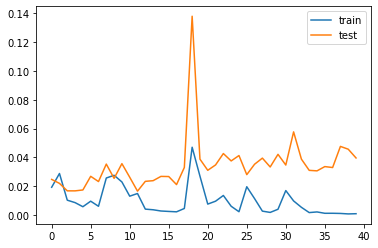

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

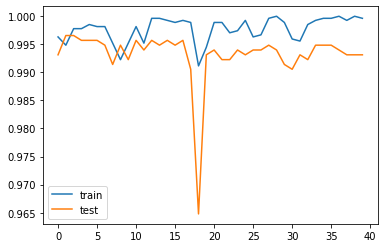

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [ ]:
preds=model.predict(X_val, verbose=1)

157/157 [==============================] - 57s 299ms/step


In [ ]:
loss, acc = model.evaluate(X_val,y_val,verbose=0)

In [ ]:
acc

0.9990041851997375

In [ ]:
result = [list(np.where(i == np.amax(i))[0]+1)[0] for i in preds]

In [ ]:
y_test =[list(np.where(i == np.amax(i))[0]+1)[0] for i in y_val]

In [ ]:
print("The accuracy is:",acc)
print("The Precison score is:",precision_score(result,y_test,average='micro'))
print("The Recall score is:",recall_score(result,y_test,average='micro'))
print("F-Measure is:",(2*precision_score(result,y_test,average='micro')*recall_score(result,y_test,average='micro'))/(recall_score(result,y_test,average='micro')+precision_score(result,y_test,average='micro')))

The accuracy is: 0.9990041851997375
The Precison score is: 0.9990041824337781
The Recall score is: 0.9990041824337781
F-Measure is: 0.9990041824337781


In [ ]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(result,y_test) 
print(results) 

[[ 454    0    0    0    0    0    0    0    0    0]
 [   0  778    0    0    0    0    0    1    0    0]
 [   0    0 1072    0    0    0    0    1    0    0]
 [   0    0    0  485    0    0    0    2    0    0]
 [   0    0    0    0  305    0    0    0    0    0]
 [   0    0    0    0    0  273    0    0    0    0]
 [   0    0    0    0    0    0  456    0    0    0]
 [   0    0    0    1    0    0    0  385    0    0]
 [   0    0    0    0    0    0    0    0  484    0]
 [   0    0    0    0    0    0    0    0    0  324]]


***Testing Rotation images folder***


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Rotated_Images_Data_Labels.xlsx")
len(df)

112

1/1 [==============================] - 0s 14ms/step
Mjc5MTQyNDcxNjU.jpeg
Predicted_Labels: 4
Predicted_Classes: Voter_id_back
Actual_Classes: driving_license_front


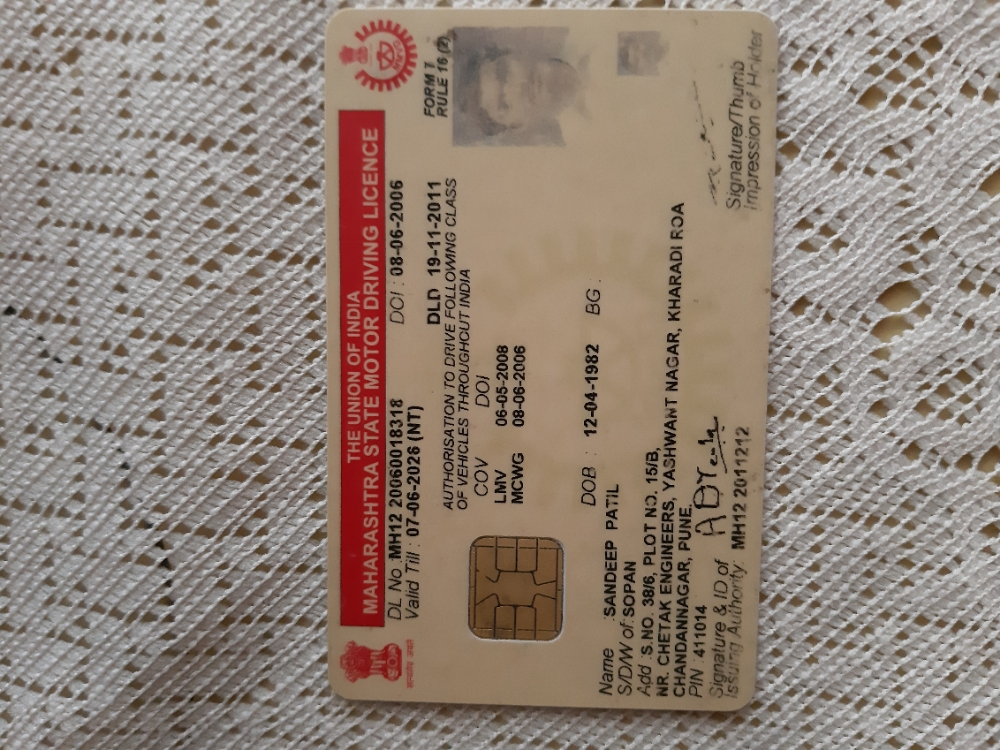

1/1 [==============================] - 0s 16ms/step
MjE5Nzc5NTYwOTY.jpeg
Predicted_Labels: 6
Predicted_Classes: driving_license_back
Actual_Classes: Aadhaar_back


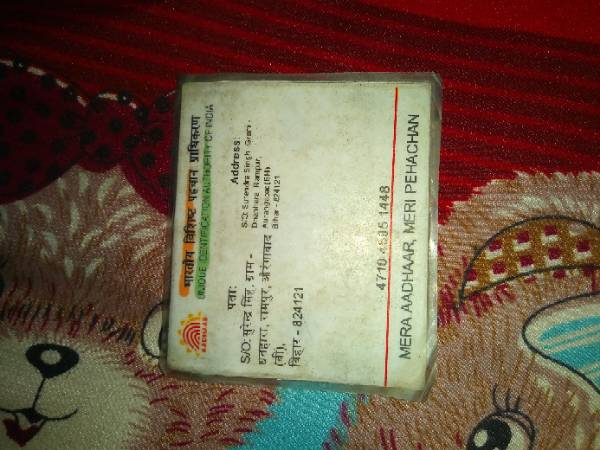

1/1 [==============================] - 0s 22ms/step
MjI4Mjc1MDM1ODE.jpeg
Predicted_Labels: 8
Predicted_Classes: passport_back
Actual_Classes: Voter_id_back


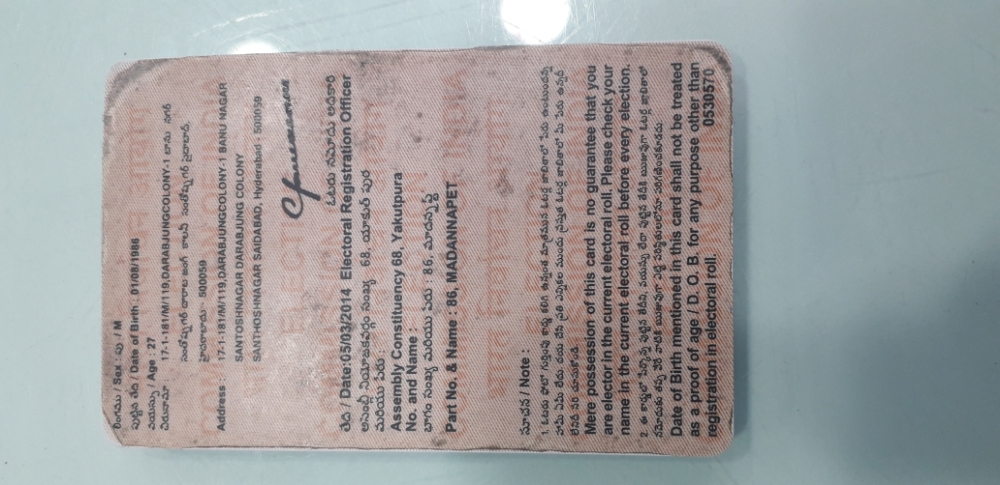

1/1 [==============================] - 0s 14ms/step
3974_1532584279_IMG_20180726_110919.jpg
Predicted_Labels: 5
Predicted_Classes: Voter_id_front
Actual_Classes: driving_license_front


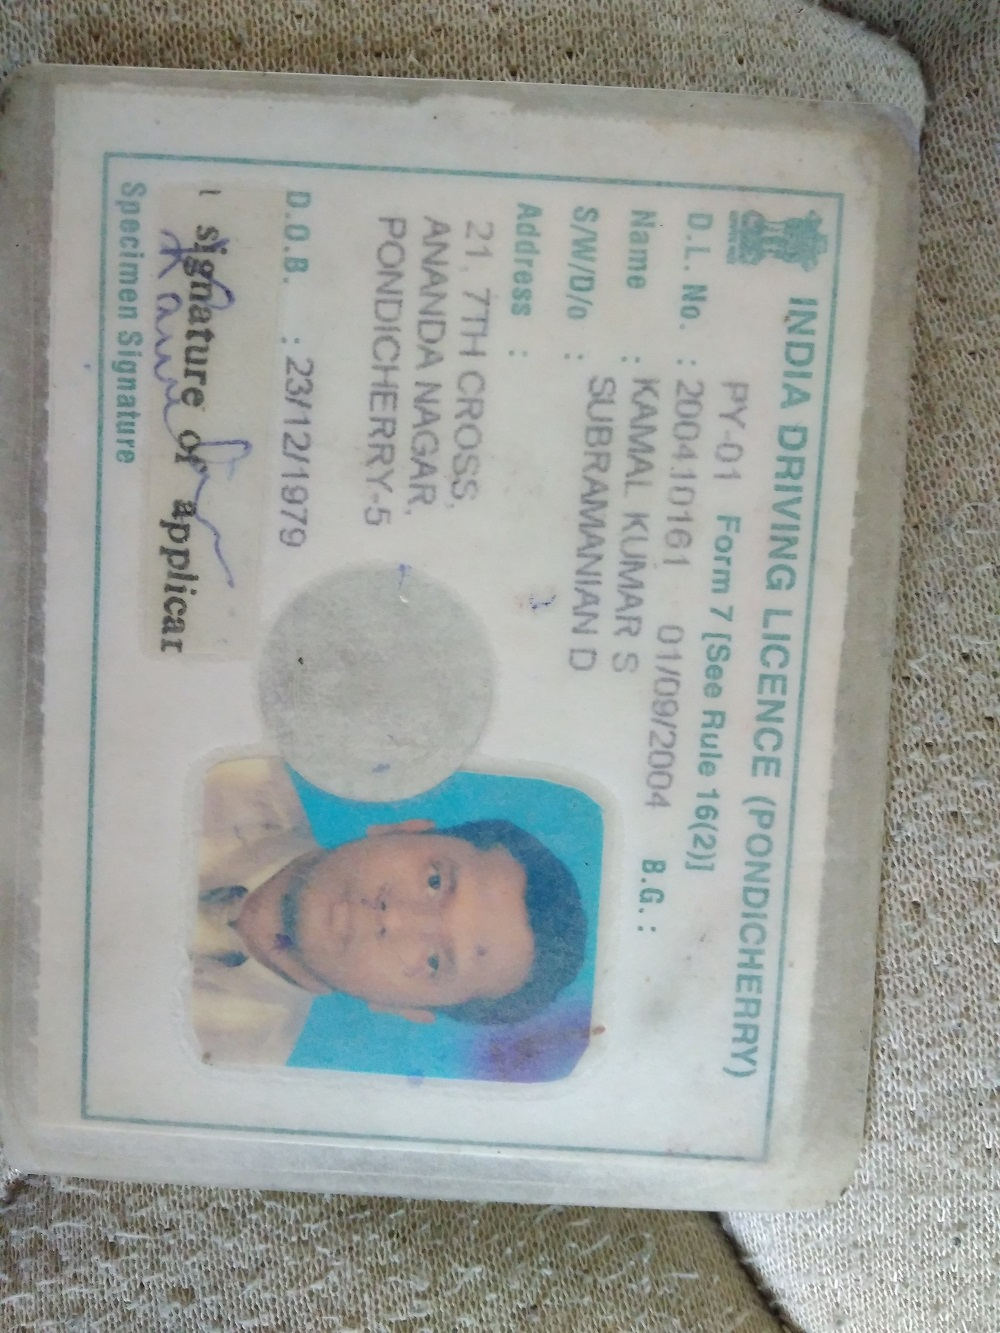

1/1 [==============================] - 0s 15ms/step
4332_1534875636_Driving_Licence_-1.jpg
Predicted_Labels: 9
Predicted_Classes: passport_front
Actual_Classes: driving_license_front


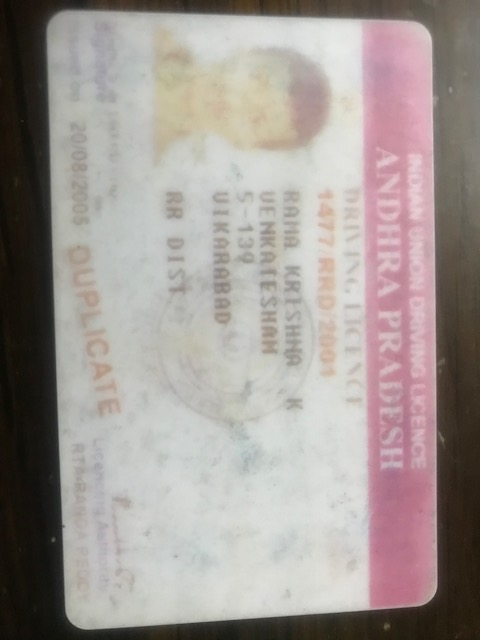

1/1 [==============================] - 0s 14ms/step
Rotate_1.jpg
Predicted_Labels: 2
Predicted_Classes: Pan
Actual_Classes: Voter_id_front


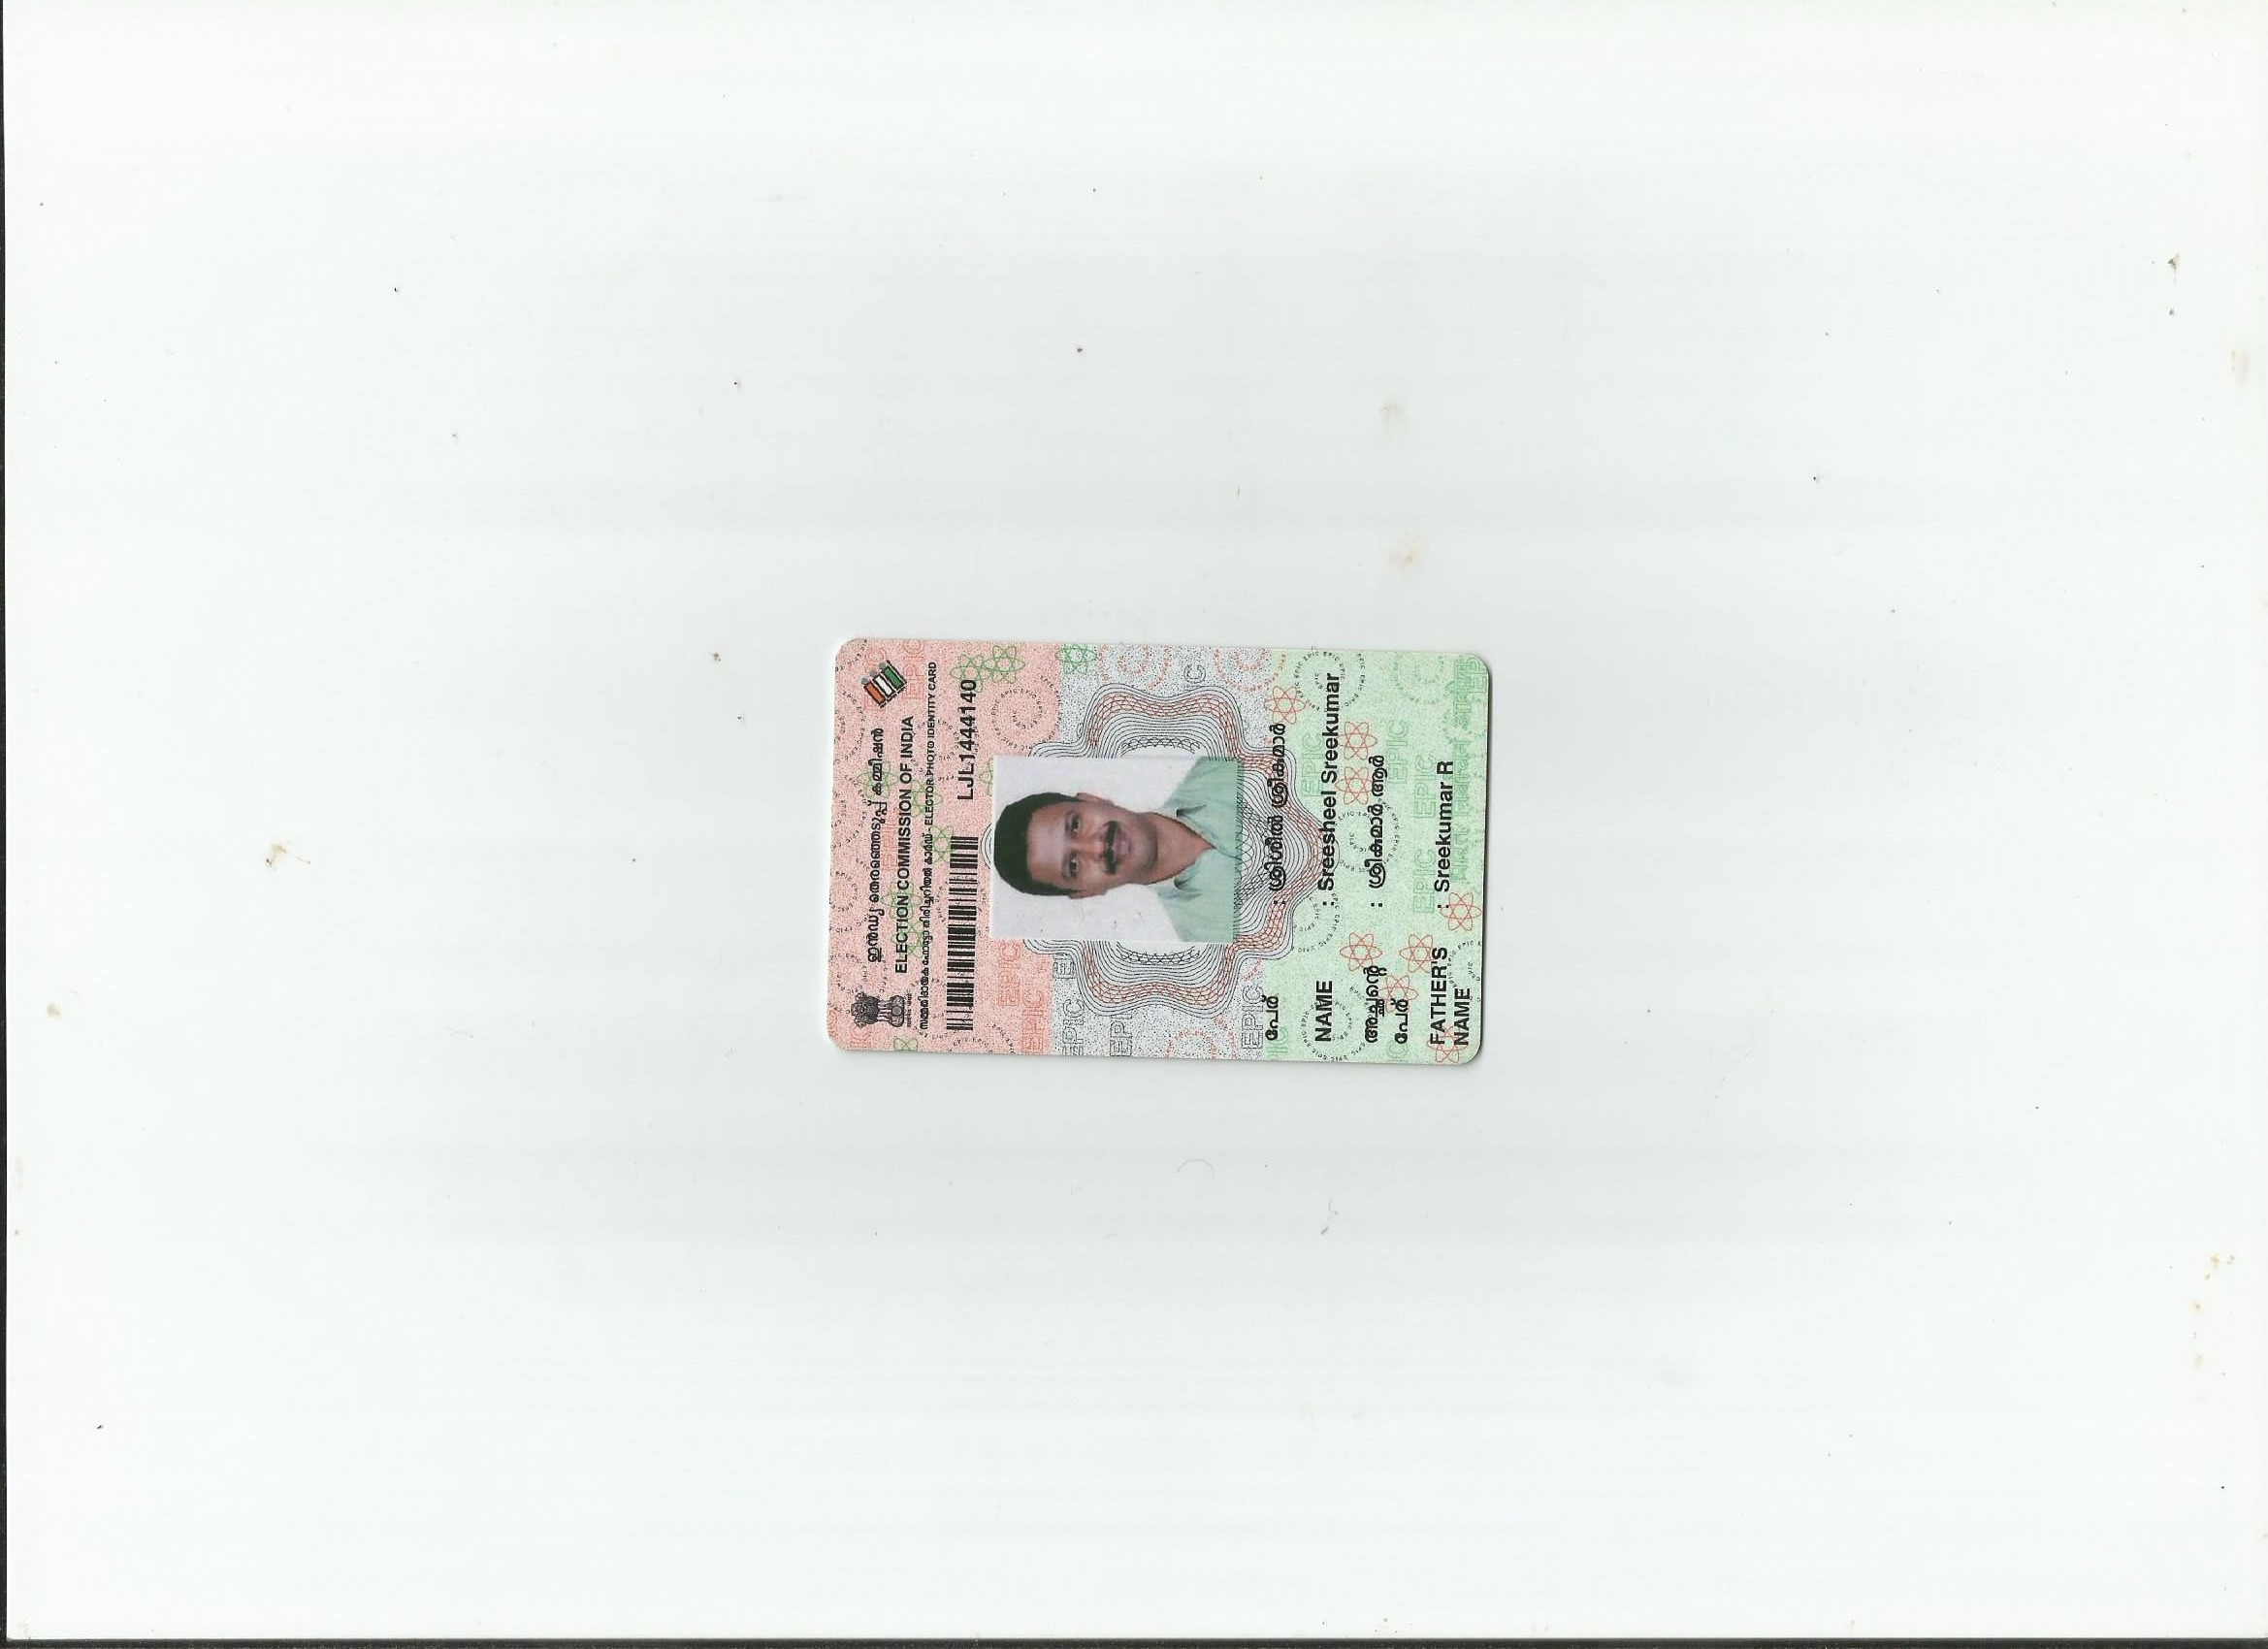

1/1 [==============================] - 0s 14ms/step
Rotate_39.jpg
Predicted_Labels: 2
Predicted_Classes: Pan
Actual_Classes: Voter_id_front


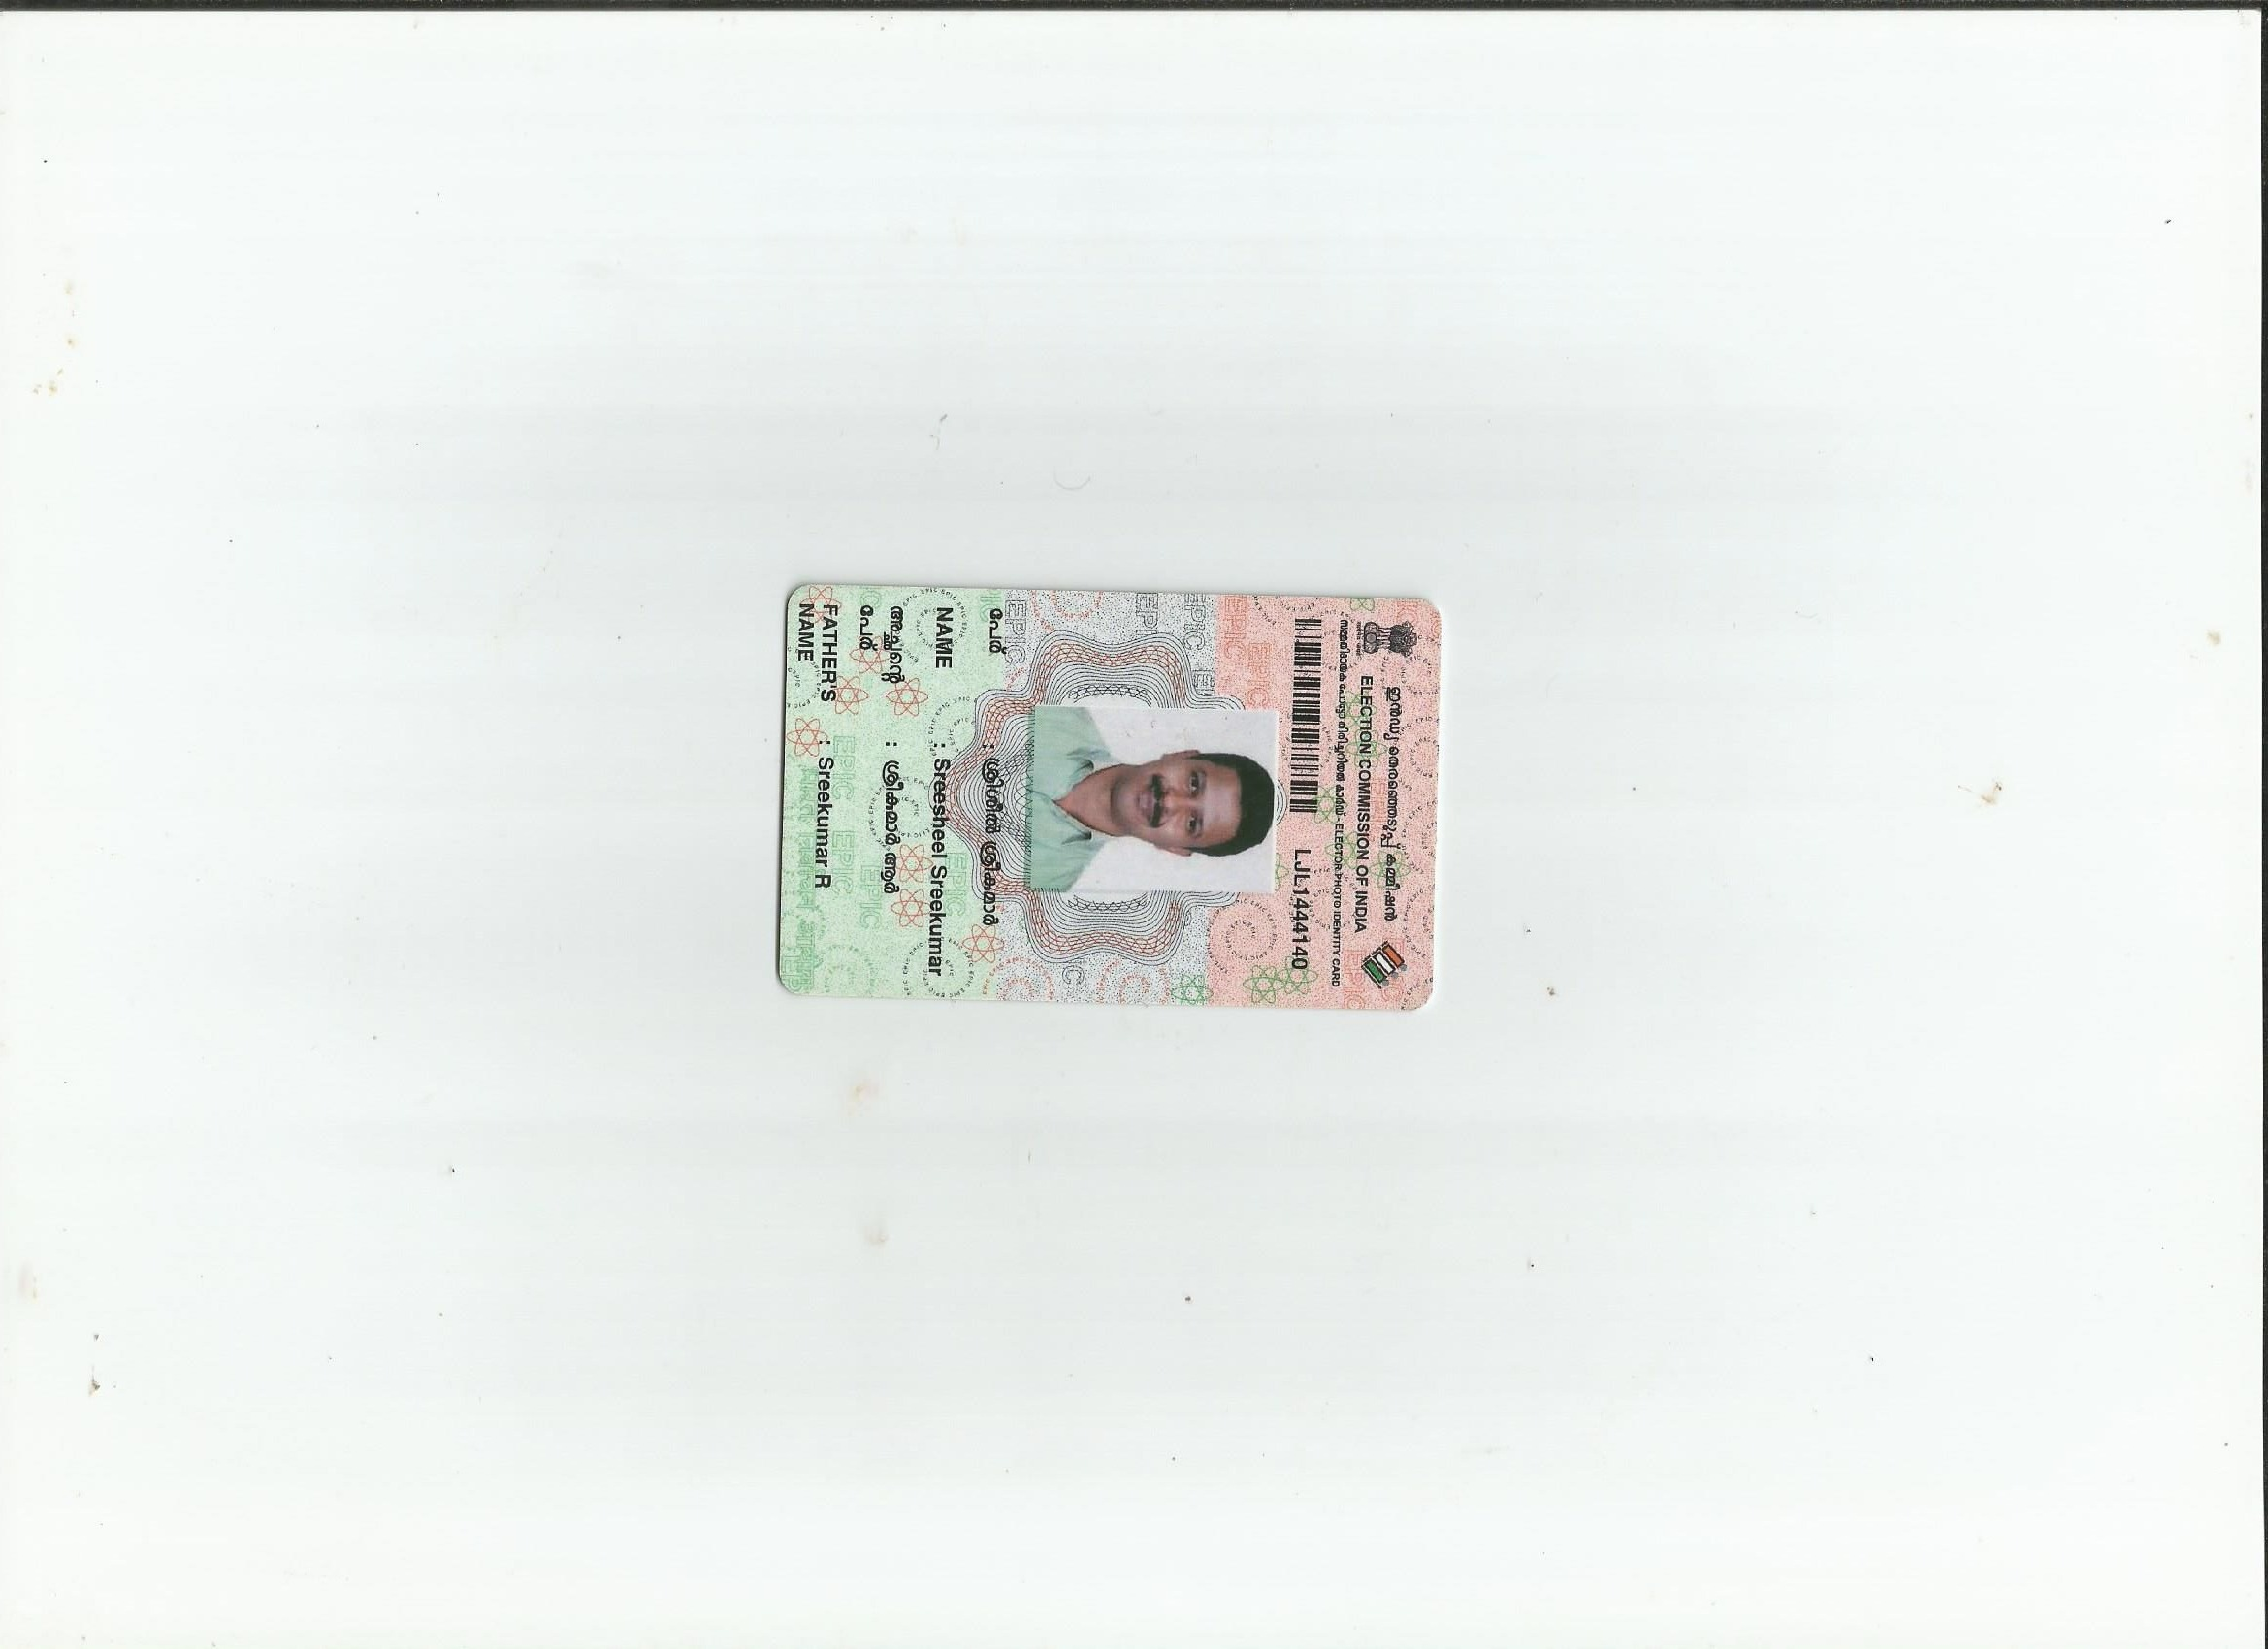

1/1 [==============================] - 0s 15ms/step


In [ ]:
from google.colab.patches import cv2_imshow

labels = pd.read_pickle("/content/drive/MyDrive/models/encoder.pkl")
c=0
p_c=0
path="/content/drive/MyDrive/KYC_DUCUMENTS.zip (Unzipped Files)/Rotated_images"
for index,img in df.iterrows():
  if img['Image_Name'] in os.listdir(path):
    display_image = (cv2.imread(os.path.join(path,img['Image_Name'])))
      
    image = (cv2.imread(os.path.join(path,img['Image_Name']), cv2.IMREAD_GRAYSCALE))
    image = cv2.resize(image,(224,224))                     
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    sample_image = expand_dims(image, 0)
        
      
    prediction=model.predict(sample_image,verbose=1)
    index=list(np.where(prediction[0] == prediction[0].max())[0])[0]
    if img['Actual_Labels']==labels.classes_[index]:
      p_c=p_c+1
    else:
      print(img['Image_Name'])
    
      print("Predicted_Labels:",index)
      print("Predicted_Classes:",labels.classes_[index])
  
      print("Actual_Classes:",img['Actual_Labels'])
    
      cv2_imshow(display_image)
    c=c+1


In [ ]:
print("Total_Rotated_Images:",c)
print("Total_correctly predicted as actual:",p_c)
print("Rotation_folder_accuracy:",(p_c/c)*100)

Total_Rotated_Images: 70
Total_correctly predicted as actual: 63
Rotation_folder_accuracy: 90.0


***Testing on test_final.zip folder***

In [ ]:
Class_test_names = []
mypath = '/content/drive/MyDrive/test_final.zip (Unzipped Files)/test_final'
for (dirpath, dirnames, filenames) in os.walk(mypath):
    Class_test_names.extend(dirnames)
    break

In [ ]:
Class_test_names

['Voter_id_front',
 'driving_license_back',
 'RC',
 'driving_license_front',
 'passport_front',
 'Voter_id_back',
 'passport_back',
 'Aadhaar_back',
 'Aadhaar_front',
 'Pan',
 'fake']

In [ ]:
from os import walk
directory='/content/drive/MyDrive/test_final.zip (Unzipped Files)/test_final'
categories=['Voter_id_back','Voter_id_front','Pan','Aadhaar_front','driving_license_front','passport_front','Aadhaar_back','passport_back','driving_license_back',"RC"]
X_final_test = []
Y_final_test = []
pred_label=[]
crct=0
total=0
for category in categories:
  if category not in Class_test_names:
    continue
  path = os.path.join(directory,category)
  
  for img in os.listdir(path):
    if img.endswith(('jpg', 'png','jpeg','JPG','PNG','JPEG')):
      display_image = (cv2.imread(os.path.join(path,img)))
      image = (cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))
      image = cv2.resize(image,(224,224)) 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
      sample_image = expand_dims(image, 0)
      prediction=model.predict(sample_image,verbose=1)
      index=list(np.where(prediction[0] == prediction[0].max())[0])[0]
      pred_label.append(labels.classes_[index])
  
                        
      X_final_test.append(sample_image)
      Y_final_test.append(category)
      if category==labels.classes_[index]:
        crct=crct+1
      else:
        print(img)
        print("Predicted_Classes:",labels.classes_[index])
  
        print("Actual_Classes:",category)
    
        cv2_imshow(display_image)

      total=total+1
    
    
    

1/1 [==============================] - 0s 58ms/step


In [ ]:
print(crct,total,(crct/total)*100)

459 459 100.0


In [ ]:
from keras.utils import np_utils
X_final_test = np.array(X_final_test)
le_ = LabelEncoder()
Y_final_test = (le_.fit_transform(Y_final_test))
print(Y_final_test)
Y_final_test= np_utils.to_categorical(Y_final_test)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 7 7 7 7 7 5 5 5 5]


In [ ]:
print(X_final_test)

[array([[[[ 49,  49,  49],
         [ 45,  45,  45],
         [ 46,  46,  46],
         ...,
         [ 41,  41,  41],
         [ 40,  40,  40],
         [ 45,  45,  45]],

        [[ 51,  51,  51],
         [ 47,  47,  47],
         [ 44,  44,  44],
         ...,
         [ 80,  80,  80],
         [ 98,  98,  98],
         [100, 100, 100]],

        [[ 48,  48,  48],
         [ 45,  45,  45],
         [ 47,  47,  47],
         ...,
         [147, 147, 147],
         [148, 148, 148],
         [147, 147, 147]],

        ...,

        [[ 33,  33,  33],
         [ 33,  33,  33],
         [ 35,  35,  35],
         ...,
         [ 22,  22,  22],
         [ 22,  22,  22],
         [ 24,  24,  24]],

        [[ 32,  32,  32],
         [ 34,  34,  34],
         [ 35,  35,  35],
         ...,
         [ 20,  20,  20],
         [ 21,  21,  21],
         [ 22,  22,  22]],

        [[ 34,  34,  34],
         [ 34,  34,  34],
         [ 32,  32,  32],
         ...,
         [ 23,  23,  23],
       

In [ ]:
loss, acc = model.evaluate(X_final_test,Y_final_test,verbose=0)

ValueError: ignored

In [ ]:
acc